"""
    Loads weather data from a CSV file and sets the 'DATE' column as the index.

    Parameters:
    file_path (str): The path to the CSV file containing weather data.

    Returns:
    pd.DataFrame: A pandas DataFrame with the 'DATE' column as the index.
    """

In [6]:
import pandas as pd
weather = pd.read_csv("/Users/apple/Downloads/3781804.csv", index_col = "DATE") #each row is referred by date

In [7]:
#we need to clean the data by eliminating no. of null values
null_pct = weather.apply(pd.isnull).sum()/weather.shape[0]

Data Cleaning before running into machine learning
"""
    Calculates the percentage of missing values for each column in the DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame to analyze.

    Returns:
    pd.Series: A Series with the percentage of missing values for each column.
    """

In [11]:
null_pct

STATION    0.000000
NAME       0.000000
PRCP       0.002456
SNWD       0.040545
TAVG       0.272641
TMAX       0.002456
TMIN       0.002456
dtype: float64

In [13]:
valid_columns = weather.columns[null_pct < 0.05]
"""
    Filters out columns from the DataFrame that have a higher percentage of missing values than the specified threshold.

    Parameters:
    df (pd.DataFrame): The DataFrame to filter.
    threshold (float): The maximum allowable percentage of missing values.

    Returns:
    pd.Index: An Index object containing the names of the columns that meet the threshold criteria.
    """

'\n    Filters out columns from the DataFrame that have a higher percentage of missing values than the specified threshold.\n\n    Parameters:\n    df (pd.DataFrame): The DataFrame to filter.\n    threshold (float): The maximum allowable percentage of missing values.\n\n    Returns:\n    pd.Index: An Index object containing the names of the columns that meet the threshold criteria.\n    '

In [15]:
valid_columns

Index(['STATION', 'NAME', 'PRCP', 'SNWD', 'TMAX', 'TMIN'], dtype='object')

In [17]:
weather = weather[valid_columns].copy()

In [19]:
weather.columns = weather.columns.str.lower()

In [21]:
weather = weather.ffill()

In [23]:
null_pct

STATION    0.000000
NAME       0.000000
PRCP       0.002456
SNWD       0.040545
TAVG       0.272641
TMAX       0.002456
TMIN       0.002456
dtype: float64

Prepping the data for machine learning.
"""
    Prepares the weather data for machine learning by removing unwanted columns and converting the index to datetime.

    Parameters:
    df (pd.DataFrame): The DataFrame to prepare.
    columns_to_exclude (list of str): A list of columns to exclude from the DataFrame.

    Returns:
    pd.DataFrame: A DataFrame ready for machine learning.
    """

In [26]:
weather.dtypes

station     object
name        object
prcp       float64
snwd       float64
tmax       float64
tmin       float64
dtype: object

In [28]:
# Convert the index to datetime if it's not already
weather.index = pd.to_datetime(weather.index)

In [29]:
weather.index

DatetimeIndex(['1970-01-01', '1970-01-02', '1970-01-03', '1970-01-04',
               '1970-01-05', '1970-01-06', '1970-01-07', '1970-01-08',
               '1970-01-09', '1970-01-10',
               ...
               '2024-08-08', '2024-08-09', '2024-08-10', '2024-08-11',
               '2024-08-13', '2024-08-14', '2024-08-15', '2024-08-16',
               '2024-08-17', '2024-08-18'],
              dtype='datetime64[ns]', name='DATE', length=19953, freq=None)

In [32]:
weather.index.year.value_counts().sort_index()

DATE
1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1981    365
1982    365
1983    365
1984    366
1985    365
1986    365
1987    365
1988    366
1989    365
1990    365
1991    365
1992    366
1993    365
1994    365
1995    365
1996    366
1997    365
1998    365
1999    365
2000    366
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    366
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    365
2023    365
2024    230
Name: count, dtype: int64

<Axes: xlabel='DATE'>

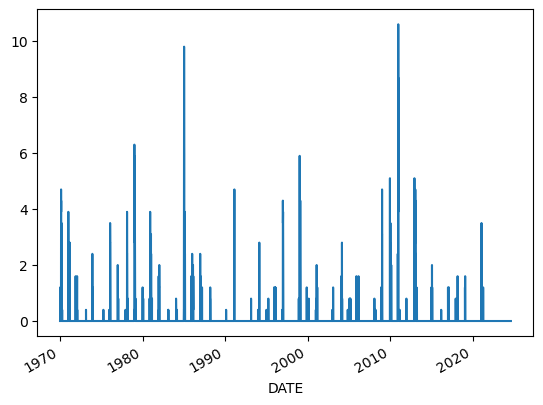

In [34]:
weather["snwd"].plot()

In [35]:
weather["target"] = weather.shift(-1)["tmax"]

In [36]:
weather

,station,name,prcp,snwd,tmax,tmin,target
DATE,,,,,,,
1970-01-01,GME00102268,"DUSSELDORF, GM",0.01,0.0,18.0,16.0,35.0
1970-01-02,GME00102268,"DUSSELDORF, GM",0.08,0.0,35.0,15.0,36.0
1970-01-03,GME00102268,"DUSSELDORF, GM",0.22,0.0,36.0,32.0,33.0
1970-01-04,GME00102268,"DUSSELDORF, GM",0.00,0.8,33.0,24.0,30.0
1970-01-05,GME00102268,"DUSSELDORF, GM",0.02,0.4,30.0,23.0,35.0
...,...,...,...,...,...,...,...
2024-08-14,GME00102268,"DUSSELDORF, GM",0.78,0.0,82.0,52.0,82.0
2024-08-15,GME00102268,"DUSSELDORF, GM",0.78,0.0,82.0,52.0,82.0
2024-08-16,GME00102268,"DUSSELDORF, GM",0.78,0.0,82.0,52.0,82.0


In [37]:
weather = weather.ffill()

In [38]:
weather

,station,name,prcp,snwd,tmax,tmin,target
DATE,,,,,,,
1970-01-01,GME00102268,"DUSSELDORF, GM",0.01,0.0,18.0,16.0,35.0
1970-01-02,GME00102268,"DUSSELDORF, GM",0.08,0.0,35.0,15.0,36.0
1970-01-03,GME00102268,"DUSSELDORF, GM",0.22,0.0,36.0,32.0,33.0
1970-01-04,GME00102268,"DUSSELDORF, GM",0.00,0.8,33.0,24.0,30.0
1970-01-05,GME00102268,"DUSSELDORF, GM",0.02,0.4,30.0,23.0,35.0
...,...,...,...,...,...,...,...
2024-08-14,GME00102268,"DUSSELDORF, GM",0.78,0.0,82.0,52.0,82.0
2024-08-15,GME00102268,"DUSSELDORF, GM",0.78,0.0,82.0,52.0,82.0
2024-08-16,GME00102268,"DUSSELDORF, GM",0.78,0.0,82.0,52.0,82.0


Writing a Machine Learning Model

In [40]:
from sklearn.linear_model import Ridge

In [41]:
rr = Ridge(alpha = 1)

In [42]:
#This line gives all the columns in the list for prediction except the mentioned
predictors = weather.columns[~weather.columns.isin(["target", "name", "station"])]

In [43]:
predictors

Index(['prcp', 'snwd', 'tmax', 'tmin'], dtype='object')

In [44]:
def backtest(weather, model, predictors, start = 3650, step = 90):
    all_predictions = []
    """
    Performs backtesting on time series data using TimeSeriesSplit.

    Parameters:
    model: A machine learning model instance (e.g., from scikit-learn) that has a `fit` and `predict` method.
    X (pd.DataFrame or np.array): The feature set for training.
    y (pd.Series or np.array): The target variable.
    n_splits (int): Number of splits for cross-validation (default is 5).

    Returns:
    float: The average mean squared error across the splits.
    """

    for i in range(start, weather.shape[0], step):
        train = weather.iloc[:i,:]
        test = weather.iloc[i:(i+step),:]

        model.fit(train[predictors], train["target"])
        preds = model.predict(test[predictors])
        preds = pd.Series(preds, index=test.index)

        combined = pd.concat([test["target"], preds], axis=1)
        combined.columns = ["actual", "prediction"]
        combined["diff"] = (combined["prediction"] - combined["actual"]).abs()
        all_predictions.append(combined)
    return pd.concat(all_predictions)

In [45]:
predictions = backtest(weather, rr, predictors)

In [46]:
predictions

,actual,prediction,diff
DATE,,,
1979-12-30,40.0,39.549962,0.450038
1979-12-31,35.0,41.067585,6.067585
1980-01-01,33.0,36.488120,3.488120
1980-01-02,33.0,35.332362,2.332362
1980-01-03,38.0,34.895328,3.104672
...,...,...,...
2024-08-14,82.0,77.278448,4.721552
2024-08-15,82.0,77.278448,4.721552
2024-08-16,82.0,77.278448,4.721552


In [47]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(predictions["actual"], predictions["prediction"])

4.025412470519461

In [48]:
# OR 
predictions["diff"].mean()

4.025412470519461

In [51]:
def pct_diff(old, new):
    return (new-old)/old

def compute_rolling(weather, horizon, col):
    label = f"rolling_{horizon}_{col}"

    weather[label] = weather[col].rolling(horizon).mean()
    weather[f"{label}_pct"] = pct_diff(weather[label], weather[col])
    return weather

rolling_horizons = [3, 14]
for horizon in rolling_horizons:
    for col in ["tmax", "tmin", "prcp"]:
        weather = compute_rolling(weather, horizon, col)

In [55]:
weather

,station,name,prcp,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,rolling_3_prcp_pct,rolling_14_tmax,rolling_14_tmax_pct,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct
DATE,,,,,,,,,,,,,,,,,,,
1970-01-01,GME00102268,"DUSSELDORF, GM",0.01,0.0,18.0,16.0,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-02,GME00102268,"DUSSELDORF, GM",0.08,0.0,35.0,15.0,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-03,GME00102268,"DUSSELDORF, GM",0.22,0.0,36.0,32.0,33.0,29.666667,0.213483,21.000000,0.523810,0.103333,1.129032,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-04,GME00102268,"DUSSELDORF, GM",0.00,0.8,33.0,24.0,30.0,34.666667,-0.048077,23.666667,0.014085,0.100000,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN
1970-01-05,GME00102268,"DUSSELDORF, GM",0.02,0.4,30.0,23.0,35.0,33.000000,-0.090909,26.333333,-0.126582,0.080000,-0.750000,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-14,GME00102268,"DUSSELDORF, GM",0.78,0.0,82.0,52.0,82.0,82.000000,0.000000,52.000000,0.000000,0.780000,0.000000,82.0,0.0,52.0,0.0,0.78,0.0
2024-08-15,GME00102268,"DUSSELDORF, GM",0.78,0.0,82.0,52.0,82.0,82.000000,0.000000,52.000000,0.000000,0.780000,0.000000,82.0,0.0,52.0,0.0,0.78,0.0
2024-08-16,GME00102268,"DUSSELDORF, GM",0.78,0.0,82.0,52.0,82.0,82.000000,0.000000,52.000000,0.000000,0.780000,0.000000,82.0,0.0,52.0,0.0,0.78,0.0


In [56]:
weather = weather.iloc[14:,:]

In [57]:
weather

,station,name,prcp,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,rolling_3_prcp_pct,rolling_14_tmax,rolling_14_tmax_pct,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct
DATE,,,,,,,,,,,,,,,,,,,
1970-01-15,GME00102268,"DUSSELDORF, GM",0.00,0.0,46.0,39.0,44.0,46.333333,-0.007194,38.666667,0.008621,0.000000,NaN,38.714286,0.188192,30.214286,0.290780,0.057857,-1.000000
1970-01-16,GME00102268,"DUSSELDORF, GM",0.04,0.0,44.0,36.0,41.0,45.666667,-0.036496,37.333333,-0.035714,0.013333,2.0,39.357143,0.117967,31.714286,0.135135,0.055000,-0.272727
1970-01-17,GME00102268,"DUSSELDORF, GM",0.00,0.0,41.0,35.0,42.0,43.666667,-0.061069,36.666667,-0.045455,0.013333,-1.0,39.714286,0.032374,31.928571,0.096197,0.039286,-1.000000
1970-01-18,GME00102268,"DUSSELDORF, GM",0.00,0.0,42.0,35.0,36.0,42.333333,-0.007874,35.333333,-0.009434,0.013333,-1.0,40.357143,0.040708,32.714286,0.069869,0.039286,-1.000000
1970-01-19,GME00102268,"DUSSELDORF, GM",0.00,0.0,36.0,32.0,36.0,39.666667,-0.092437,34.000000,-0.058824,0.000000,NaN,40.785714,-0.117338,33.357143,-0.040685,0.037857,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-14,GME00102268,"DUSSELDORF, GM",0.78,0.0,82.0,52.0,82.0,82.000000,0.000000,52.000000,0.000000,0.780000,0.0,82.000000,0.000000,52.000000,0.000000,0.780000,0.000000
2024-08-15,GME00102268,"DUSSELDORF, GM",0.78,0.0,82.0,52.0,82.0,82.000000,0.000000,52.000000,0.000000,0.780000,0.0,82.000000,0.000000,52.000000,0.000000,0.780000,0.000000
2024-08-16,GME00102268,"DUSSELDORF, GM",0.78,0.0,82.0,52.0,82.0,82.000000,0.000000,52.000000,0.000000,0.780000,0.0,82.000000,0.000000,52.000000,0.000000,0.780000,0.000000


In [58]:
weather = weather.fillna(0)

In [59]:
weather

,station,name,prcp,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,rolling_3_tmin_pct,rolling_3_prcp,rolling_3_prcp_pct,rolling_14_tmax,rolling_14_tmax_pct,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct
DATE,,,,,,,,,,,,,,,,,,,
1970-01-15,GME00102268,"DUSSELDORF, GM",0.00,0.0,46.0,39.0,44.0,46.333333,-0.007194,38.666667,0.008621,0.000000,0.0,38.714286,0.188192,30.214286,0.290780,0.057857,-1.000000
1970-01-16,GME00102268,"DUSSELDORF, GM",0.04,0.0,44.0,36.0,41.0,45.666667,-0.036496,37.333333,-0.035714,0.013333,2.0,39.357143,0.117967,31.714286,0.135135,0.055000,-0.272727
1970-01-17,GME00102268,"DUSSELDORF, GM",0.00,0.0,41.0,35.0,42.0,43.666667,-0.061069,36.666667,-0.045455,0.013333,-1.0,39.714286,0.032374,31.928571,0.096197,0.039286,-1.000000
1970-01-18,GME00102268,"DUSSELDORF, GM",0.00,0.0,42.0,35.0,36.0,42.333333,-0.007874,35.333333,-0.009434,0.013333,-1.0,40.357143,0.040708,32.714286,0.069869,0.039286,-1.000000
1970-01-19,GME00102268,"DUSSELDORF, GM",0.00,0.0,36.0,32.0,36.0,39.666667,-0.092437,34.000000,-0.058824,0.000000,0.0,40.785714,-0.117338,33.357143,-0.040685,0.037857,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-14,GME00102268,"DUSSELDORF, GM",0.78,0.0,82.0,52.0,82.0,82.000000,0.000000,52.000000,0.000000,0.780000,0.0,82.000000,0.000000,52.000000,0.000000,0.780000,0.000000
2024-08-15,GME00102268,"DUSSELDORF, GM",0.78,0.0,82.0,52.0,82.0,82.000000,0.000000,52.000000,0.000000,0.780000,0.0,82.000000,0.000000,52.000000,0.000000,0.780000,0.000000
2024-08-16,GME00102268,"DUSSELDORF, GM",0.78,0.0,82.0,52.0,82.0,82.000000,0.000000,52.000000,0.000000,0.780000,0.0,82.000000,0.000000,52.000000,0.000000,0.780000,0.000000


In [60]:
def expand_mean(df):
    return df.expanding(1).mean()
for col in ["tmax", "tmin", "prcp"]:
    weather[f"month_avg{col}"] = weather[col].groupby(weather.index.month, group_keys=False).apply(expand_mean)
    weather[f"day_avg{col}"] = weather[col].groupby(weather.index.day_of_year, group_keys=False).apply(expand_mean)
    

In [61]:
weather

,station,name,prcp,snwd,tmax,tmin,target,rolling_3_tmax,rolling_3_tmax_pct,rolling_3_tmin,...,rolling_14_tmin,rolling_14_tmin_pct,rolling_14_prcp,rolling_14_prcp_pct,month_avgtmax,day_avgtmax,month_avgtmin,day_avgtmin,month_avgprcp,day_avgprcp
DATE,,,,,,,,,,,,,,,,,,,,,
1970-01-15,GME00102268,"DUSSELDORF, GM",0.00,0.0,46.0,39.0,44.0,46.333333,-0.007194,38.666667,...,30.214286,0.290780,0.057857,-1.000000,46.000000,46.000000,39.000000,39.000000,0.000000,0.000000
1970-01-16,GME00102268,"DUSSELDORF, GM",0.04,0.0,44.0,36.0,41.0,45.666667,-0.036496,37.333333,...,31.714286,0.135135,0.055000,-0.272727,45.000000,44.000000,37.500000,36.000000,0.020000,0.040000
1970-01-17,GME00102268,"DUSSELDORF, GM",0.00,0.0,41.0,35.0,42.0,43.666667,-0.061069,36.666667,...,31.928571,0.096197,0.039286,-1.000000,43.666667,41.000000,36.666667,35.000000,0.013333,0.000000
1970-01-18,GME00102268,"DUSSELDORF, GM",0.00,0.0,42.0,35.0,36.0,42.333333,-0.007874,35.333333,...,32.714286,0.069869,0.039286,-1.000000,43.250000,42.000000,36.250000,35.000000,0.010000,0.000000
1970-01-19,GME00102268,"DUSSELDORF, GM",0.00,0.0,36.0,32.0,36.0,39.666667,-0.092437,34.000000,...,33.357143,-0.040685,0.037857,-1.000000,41.800000,36.000000,35.400000,32.000000,0.008000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-14,GME00102268,"DUSSELDORF, GM",0.78,0.0,82.0,52.0,82.0,82.000000,0.000000,52.000000,...,52.000000,0.000000,0.780000,0.000000,75.131002,76.981818,56.448726,58.381818,0.092786,0.102727
2024-08-15,GME00102268,"DUSSELDORF, GM",0.78,0.0,82.0,52.0,82.0,82.000000,0.000000,52.000000,...,52.000000,0.000000,0.780000,0.000000,75.135071,75.509091,56.446090,57.181818,0.093193,0.128909
2024-08-16,GME00102268,"DUSSELDORF, GM",0.78,0.0,82.0,52.0,82.0,82.000000,0.000000,52.000000,...,52.000000,0.000000,0.780000,0.000000,75.139136,73.581818,56.443458,56.672727,0.093600,0.107091


In [62]:
predictors = weather.columns[~weather.columns.isin(["target", "name", "station"])]

In [63]:
predictors

Index(['prcp', 'snwd', 'tmax', 'tmin', 'rolling_3_tmax', 'rolling_3_tmax_pct',
       'rolling_3_tmin', 'rolling_3_tmin_pct', 'rolling_3_prcp',
       'rolling_3_prcp_pct', 'rolling_14_tmax', 'rolling_14_tmax_pct',
       'rolling_14_tmin', 'rolling_14_tmin_pct', 'rolling_14_prcp',
       'rolling_14_prcp_pct', 'month_avgtmax', 'day_avgtmax', 'month_avgtmin',
       'day_avgtmin', 'month_avgprcp', 'day_avgprcp'],
      dtype='object')

In [64]:
predictions = backtest(weather, rr, predictors)

In [65]:
predictions

,actual,prediction,diff
DATE,,,
1980-01-13,30.0,30.853847,0.853847
1980-01-14,26.0,33.071163,7.071163
1980-01-15,32.0,30.075430,1.924570
1980-01-16,32.0,33.736127,1.736127
1980-01-17,32.0,32.589449,0.589449
...,...,...,...
2024-08-14,82.0,76.522437,5.477563
2024-08-15,82.0,76.388266,5.611734
2024-08-16,82.0,76.177990,5.822010


In [66]:
predictions["diff"].mean()

3.8387987857113663

In [67]:
predictions.sort_values("diff", ascending=False)

,actual,prediction,diff
DATE,,,
2009-01-08,29.0,52.673482,23.673482
2015-07-11,65.0,83.985313,18.985313
1982-12-14,54.0,35.198844,18.801156
2012-05-04,49.0,67.460579,18.460579
2015-07-07,67.0,85.413399,18.413399
...,...,...,...
2022-11-17,54.0,53.998716,0.001284
1986-11-03,49.0,48.998802,0.001198
1985-03-28,45.0,45.001057,0.001057


<Axes: xlabel='diff'>

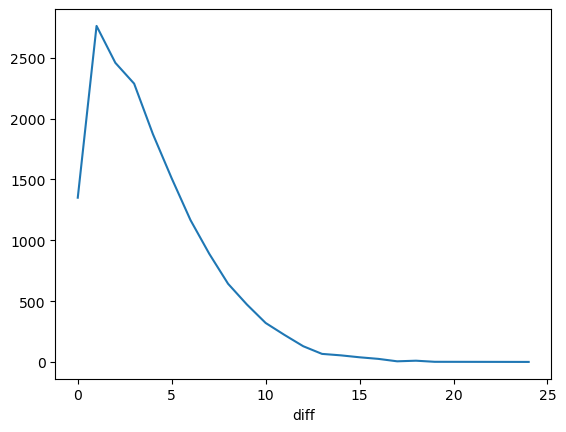

In [68]:
predictions["diff"].round().value_counts().sort_index().plot()

In [69]:
predictions

,actual,prediction,diff
DATE,,,
1980-01-13,30.0,30.853847,0.853847
1980-01-14,26.0,33.071163,7.071163
1980-01-15,32.0,30.075430,1.924570
1980-01-16,32.0,33.736127,1.736127
1980-01-17,32.0,32.589449,0.589449
...,...,...,...
2024-08-14,82.0,76.522437,5.477563
2024-08-15,82.0,76.388266,5.611734
2024-08-16,82.0,76.177990,5.822010


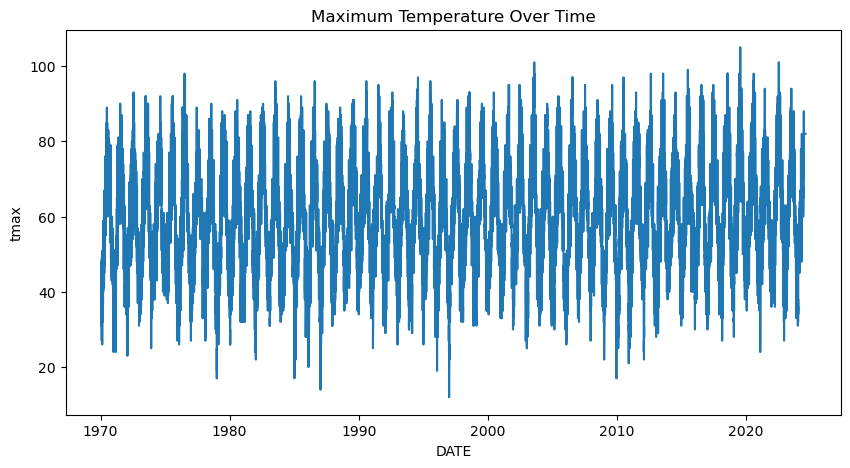

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

# Time series plot of temperature
plt.figure(figsize=(10, 5))
plt.plot(weather.index, weather['tmax'])
plt.title('Maximum Temperature Over Time')
plt.xlabel('DATE')
plt.ylabel('tmax')
plt.show()


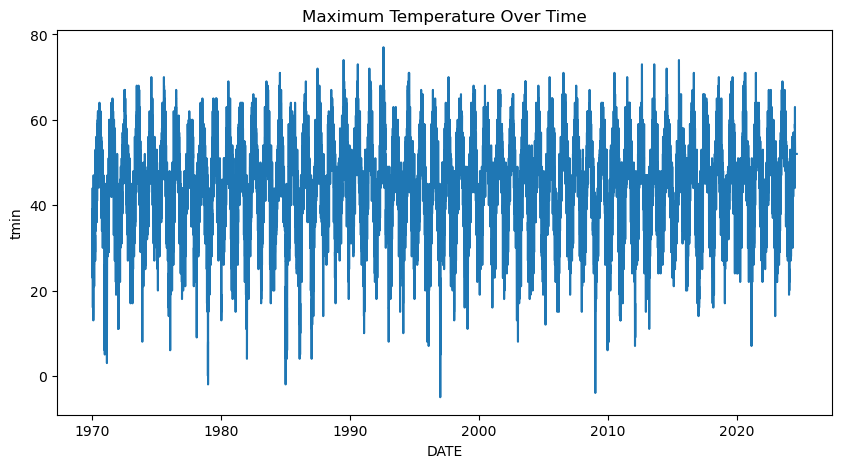

In [106]:
plt.figure(figsize=(10, 5))
plt.plot(weather.index, weather['tmin'])
plt.title('Maximum Temperature Over Time')
plt.xlabel('DATE')
plt.ylabel('tmin')
plt.show()